In [1]:
import pandas as pd
import numpy as np

In [2]:
folder = 'dataframes_isp/data_Nude_Project_UCmCg86gXHnROv4ZIXbdGWlg'

df_categories = pd.read_csv(f'./{folder}/df_categories.csv')
df_comments = pd.read_csv(f'./{folder}/df_comments.csv')
df_transcript = pd.read_csv(f'./{folder}/df_transcript.csv')
df_videos = pd.read_csv(f'./{folder}/df_videos.csv')
df_stats = pd.read_csv(f'./{folder}/df_channel_stats.csv')

In [3]:
# Specify the path to your .txt file
api_path = "./keys/api_key_youtube.txt"
video_id_path = "./keys/video_id_youtube.txt"

# Get api_key text
with open(api_path, 'r') as file:
    api_key = str(file.read())

# Get video_id text
with open(video_id_path, 'r') as file:
    video_id = str(file.read())

In [4]:
import requests
import time

# Channel ID or Username
channel_id = 'UCmCg86gXHnROv4ZIXbdGWlg'  # Example: Google Developers channel ID

# Define the API endpoint and parameters
url = 'https://www.googleapis.com/youtube/v3/channels'
params = {
    'part': 'snippet,statistics',
    'id': channel_id,
    'key': api_key
}

# Make the API request
response = requests.get(url, params=params)
data = response.json()

In [5]:
data['items'][0]['statistics']

{'viewCount': '235453222',
 'subscriberCount': '709000',
 'hiddenSubscriberCount': False,
 'videoCount': '1293'}

In [11]:
def get_channel_data(api_key, channel_id):

    url = 'https://www.googleapis.com/youtube/v3/channels'
    params = {
        'part': 'snippet,statistics',
        'id': channel_id,
        'key': api_key
    }

    # Make the API request
    response = requests.get(url, params=params)
    data = response.json()

    if data:
        metadata = data['items'][0]
        channel_data = {
            'name': metadata['snippet']['title'],
            'description': metadata['snippet']['description'],
            'publishedAt': metadata['snippet']['publishedAt'],
            'viewCount': metadata['statistics']['viewCount'],
            'subscriberCount': metadata['statistics']['subscriberCount'],
            'videoCount': metadata['statistics']['videoCount']
        }
        if 'country' in metadata['snippet'].keys():
            channel_data['country'] = metadata['snippet']['country'] 
        else:
            channel_data['country'] = 'N/A'
        return(channel_data)
    else:
        return None

In [14]:
channel_id_list = df_comments['author_channel_id'].unique()[:1000]
comments_channel_data = [get_channel_data(api_key, channel) for channel in channel_id_list]

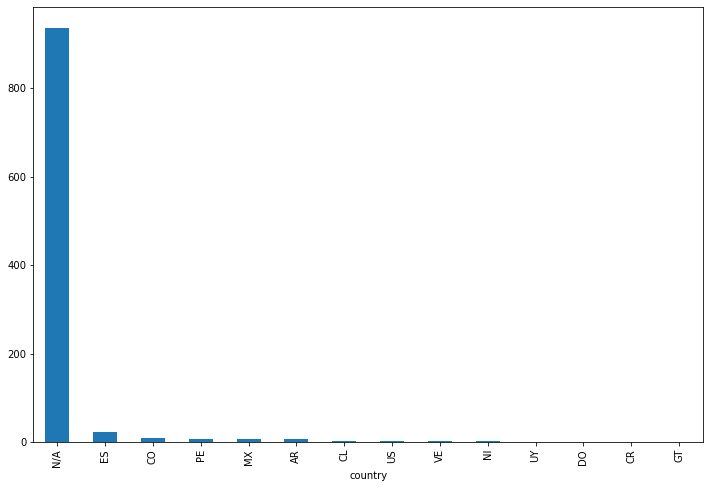

In [20]:
df_comment_channel = pd.DataFrame(comments_channel_data)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
df_comment_channel['country'].value_counts().plot(kind='bar')
plt.show();